In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pickle

In [2]:
def flatten_property(peaks, property):
    flat = []
    for i in range(0, len(peaks['properties'])):
        flat.extend(peaks['properties'][i][property])
    return np.array(flat)

In [3]:
peak_folder = '/Users/emiliebertholet/cernbox/coldbox_data/raw_waveforms'
sample = 'cosmics'

with open(f'{peak_folder}/waveforms_{sample}_wlenNone_prom200.pkl', 'rb') as file:
    wlenNone_prom200 = pickle.load(file)
with open(f'{peak_folder}/waveforms_{sample}_wlen500_prom200.pkl', 'rb') as file:
    wlenNone_prom500 = pickle.load(file)
with open(f'{peak_folder}/waveforms_{sample}_wlenNone_prom500.pkl', 'rb') as file:
    wlen500_prom200 = pickle.load(file)
with open(f'{peak_folder}/waveforms_{sample}_wlen500_prom500.pkl', 'rb') as file:
    wlen500_prom500 = pickle.load(file)

print('Cosmics')
print(f'waveforms_{sample}_wlenNone_prom200', len(wlenNone_prom200['flat_peak_indices']))
print(f'waveforms_{sample}_wlen500_prom200',  len(wlenNone_prom500['flat_peak_indices']))
print(f'waveforms_{sample}_wlenNone_prom500', len(wlen500_prom200['flat_peak_indices']))
print(f'waveforms_{sample}_wlen500_prom500',  len(wlen500_prom500['flat_peak_indices']))
print(wlenNone_prom200.keys())


Cosmics
waveforms_cosmics_wlenNone_prom200 64632
waveforms_cosmics_wlen500_prom200 59299
waveforms_cosmics_wlenNone_prom500 27508
waveforms_cosmics_wlen500_prom500 26400
dict_keys(['peak_indices_2d', 'peak_heights', 'properties', 'waveforms', 'flat_peak_indices', 'pedestals'])


In [4]:
prop_dict  = {
    'A':[wlenNone_prom200, f'waveforms_{sample}_wlenNone_prom200'],
    'B':[wlenNone_prom500, f'waveforms_{sample}_wlen500_prom200'],
    'C':[wlen500_prom200,  f'waveforms_{sample}_wlenNone_prom500'],
    'D':[wlen500_prom500,  f'waveforms_{sample}_wlen500_prom500']
}

## Plot waveforms

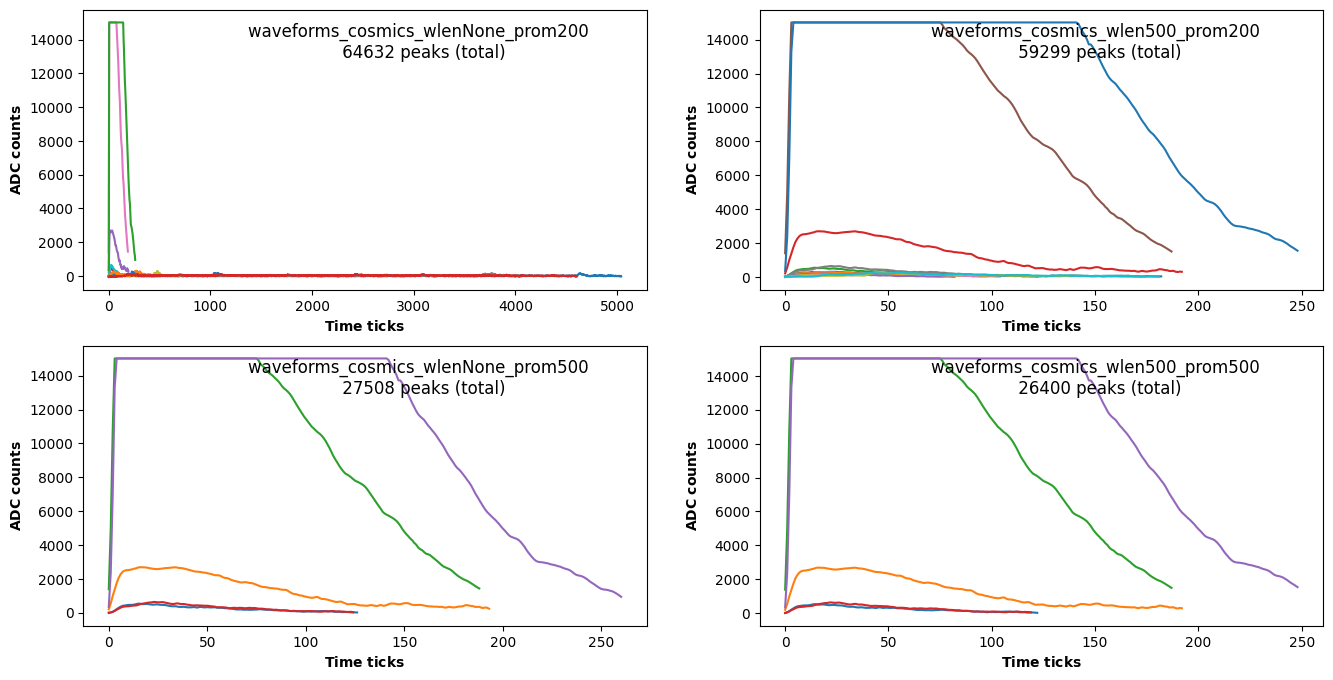

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for prop in prop_dict:
    res = prop_dict[prop][0]
    ax = axs.flatten()[j]
    # nTirggerRecords = 50 #len(res['waveforms'])
    nTirggerRecords = len(res['waveforms'])
    Ntot, Nsel = 0, 0
    # for trigger_idx in range(0, nTirggerRecords):
    for trigger_idx in range(2, 3):
        trigger_record = res['waveforms'][trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
            ax.plot(trigger_record[i].transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    ax.set_title(f"{prop_dict[prop][1]} \n {len(prop_dict[prop][0]['flat_peak_indices'])} peaks (total)", y=0.8, x = 0.6);
    j+=1




## Selection

In [6]:
print('Find ADC saturation threshold ')
for prop in prop_dict:
    maximum = 0
    for trigger_idx in range(0, len(prop_dict[prop][0]['peak_heights'])):
        peak_heights_rec = prop_dict[prop][0]['peak_heights'][trigger_idx]
        if len(peak_heights_rec)<1:
            continue
        if peak_heights_rec.max()>maximum: 
            maximum = peak_heights_rec.max()
    print(prop_dict[prop][1], maximum)

Find ADC saturation threshold 
waveforms_cosmics_wlenNone_prom200 16383
waveforms_cosmics_wlen500_prom200 16383
waveforms_cosmics_wlenNone_prom500 16383
waveforms_cosmics_wlen500_prom500 16383


In [7]:
res.keys()

dict_keys(['peak_indices_2d', 'peak_heights', 'properties', 'waveforms', 'flat_peak_indices', 'pedestals'])

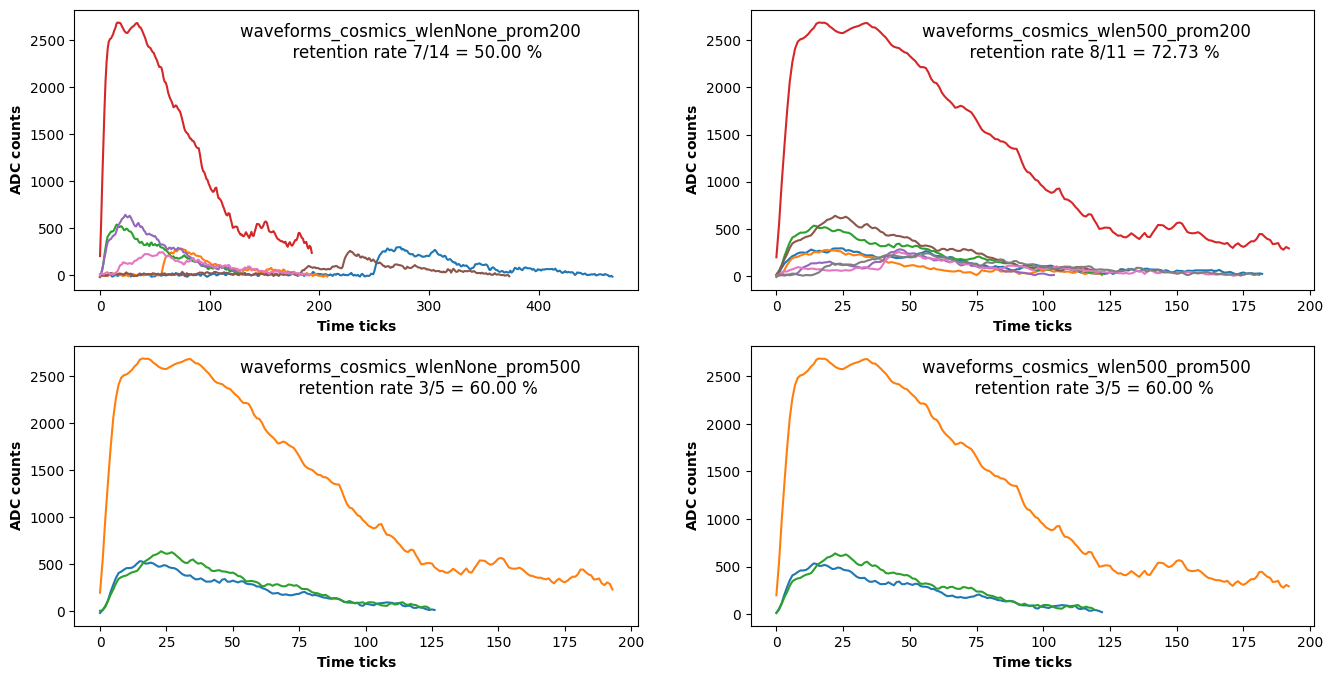

In [7]:
ADCsat = 16383

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for prop in prop_dict:
    res = prop_dict[prop][0]
    ax = axs.flatten()[j]
    # nTirggerRecords = 500 #len(res['waveforms'])
    nTirggerRecords = len(res['waveforms'])
    Ntot, Nsel = 0, 0
    # for trigger_idx in range(0, nTirggerRecords):
    for trigger_idx in range(2, 3):
        trigger_record = res['waveforms'][trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
            Ntot+=1
            if (res['peak_heights'][trigger_idx][i] + res['pedestals'][trigger_idx] < ADCsat) and (500 > res['properties'][trigger_idx]['widths'][i] > 100):
                Nsel+=1
                ax.plot(trigger_record[i].transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    ax.set_title(f"{prop_dict[prop][1]} \n  retention rate {Nsel}/{Ntot} = {Nsel*100/Ntot:.2f} %", y=0.8, x = 0.6);
    j+=1;

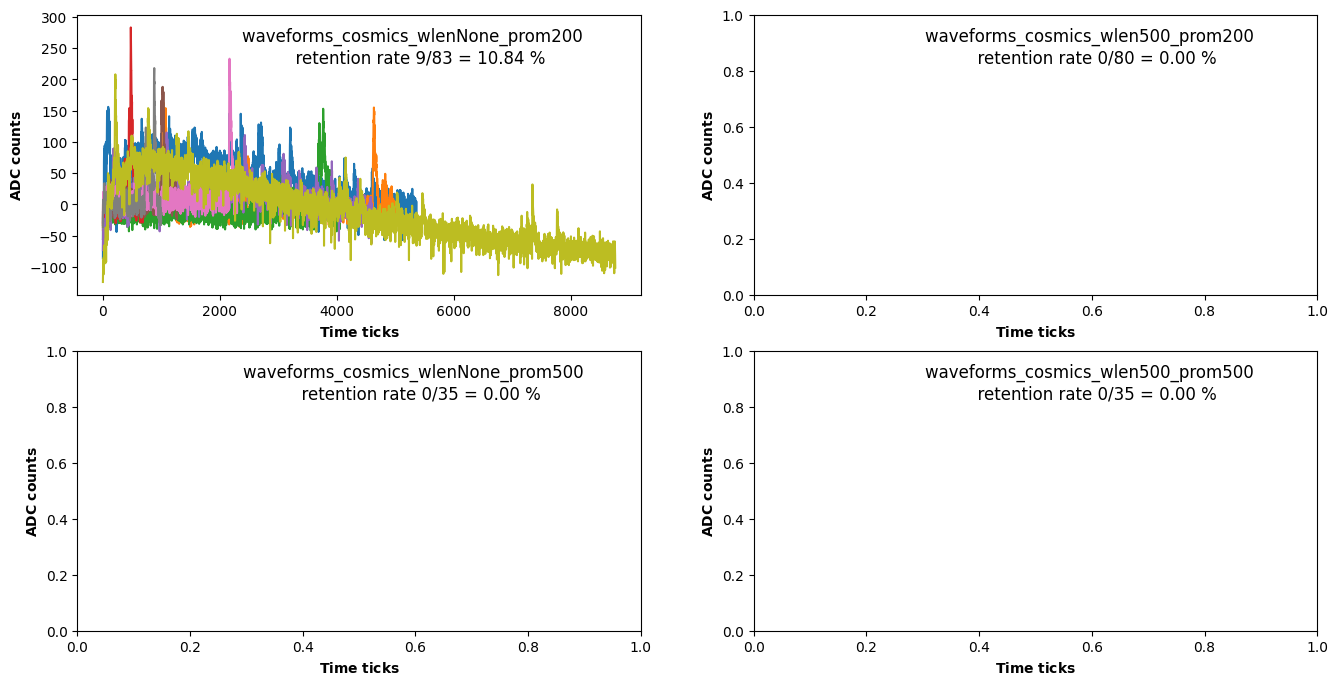

In [9]:
ADCsat = 16383

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for prop in prop_dict:
    res = prop_dict[prop][0]
    ax = axs.flatten()[j]
    nTirggerRecords = 5 #len(res['waveforms'])
    Ntot, Nsel = 0, 0
    for trigger_idx in range(0, nTirggerRecords):
        trigger_record = res['waveforms'][trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
            Ntot+=1
            # if (res['peak_heights'][trigger_idx][i] + res['pedestals'][trigger_idx] < ADCsat) and (500 > res['properties'][trigger_idx]['widths'][i] > 100):
            if (res['peak_heights'][trigger_idx][i] + res['pedestals'][trigger_idx] < ADCsat) and (500 < res['properties'][trigger_idx]['widths'][i]):
                Nsel+=1
                ax.plot(trigger_record[i].transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    ax.set_title(f"{prop_dict[prop][1]} \n  retention rate {Nsel}/{Ntot} = {Nsel*100/Ntot:.2f} %", y=0.8, x = 0.6);
    j+=1;

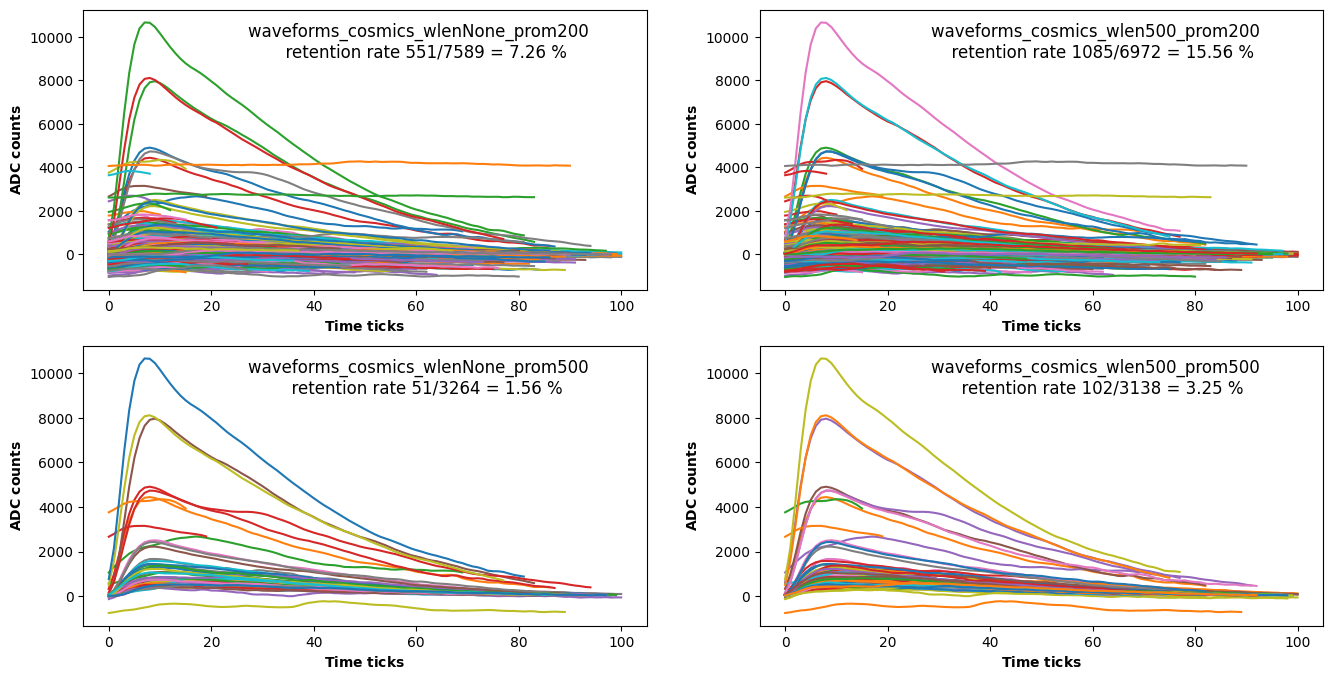

In [10]:
ADCsat = 16383

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for prop in prop_dict:
    res = prop_dict[prop][0]
    ax = axs.flatten()[j]
    nTirggerRecords = 500 #len(res['waveforms'])
    Ntot, Nsel = 0, 0
    for trigger_idx in range(0, nTirggerRecords):
        trigger_record = res['waveforms'][trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
            Ntot+=1
            # if (res['peak_heights'][trigger_idx][i] + res['pedestals'][trigger_idx] < ADCsat) and (500 > res['properties'][trigger_idx]['widths'][i] > 100):
            if (res['peak_heights'][trigger_idx][i] + res['pedestals'][trigger_idx] < ADCsat) and ( res['properties'][trigger_idx]['widths'][i] < 100):
                Nsel+=1
                ax.plot(trigger_record[i].transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    ax.set_title(f"{prop_dict[prop][1]} \n  retention rate {Nsel}/{Ntot} = {Nsel*100/Ntot:.2f} %", y=0.8, x = 0.6);
    j+=1;

# Peak Heights and Positions

### Sanity Chekcs

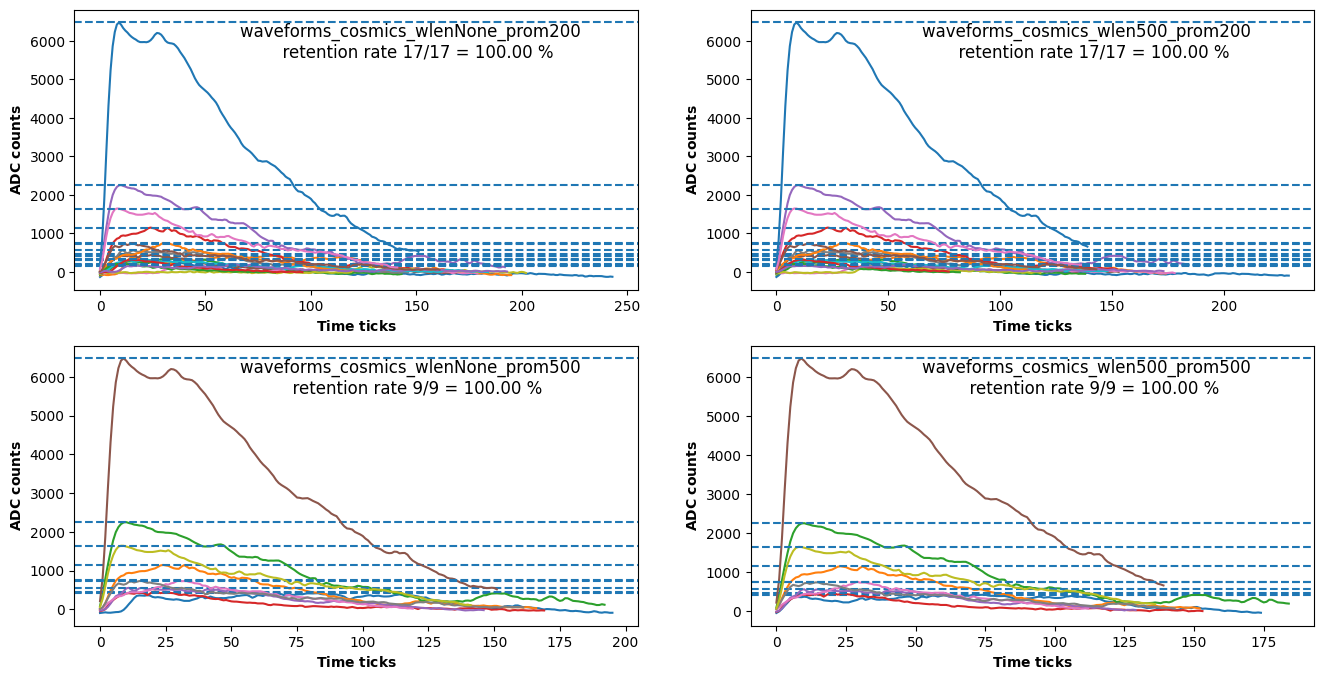

In [11]:
ADCsat = 16383

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for prop in prop_dict:
    res = prop_dict[prop][0]
    ax = axs.flatten()[j]
    nTirggerRecords = 1 #len(res['waveforms'])
    Ntot, Nsel = 0, 0
    for trigger_idx in range(0, nTirggerRecords):
        trigger_record = res['waveforms'][trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
            Ntot+=1
            # if (res['peak_heights'][trigger_idx][i] + res['pedestals'][trigger_idx] < ADCsat) and (500 > res['properties'][trigger_idx]['widths'][i] > 100):
            Nsel+=1
            ax.plot(trigger_record[i].transpose())
            ax.axhline(y = prop_dict[prop][0]['peak_heights'][trigger_idx][i], linestyle='--')
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    ax.set_title(f"{prop_dict[prop][1]} \n  retention rate {Nsel}/{Ntot} = {Nsel*100/Ntot:.2f} %", y=0.8, x = 0.6);
    j+=1;

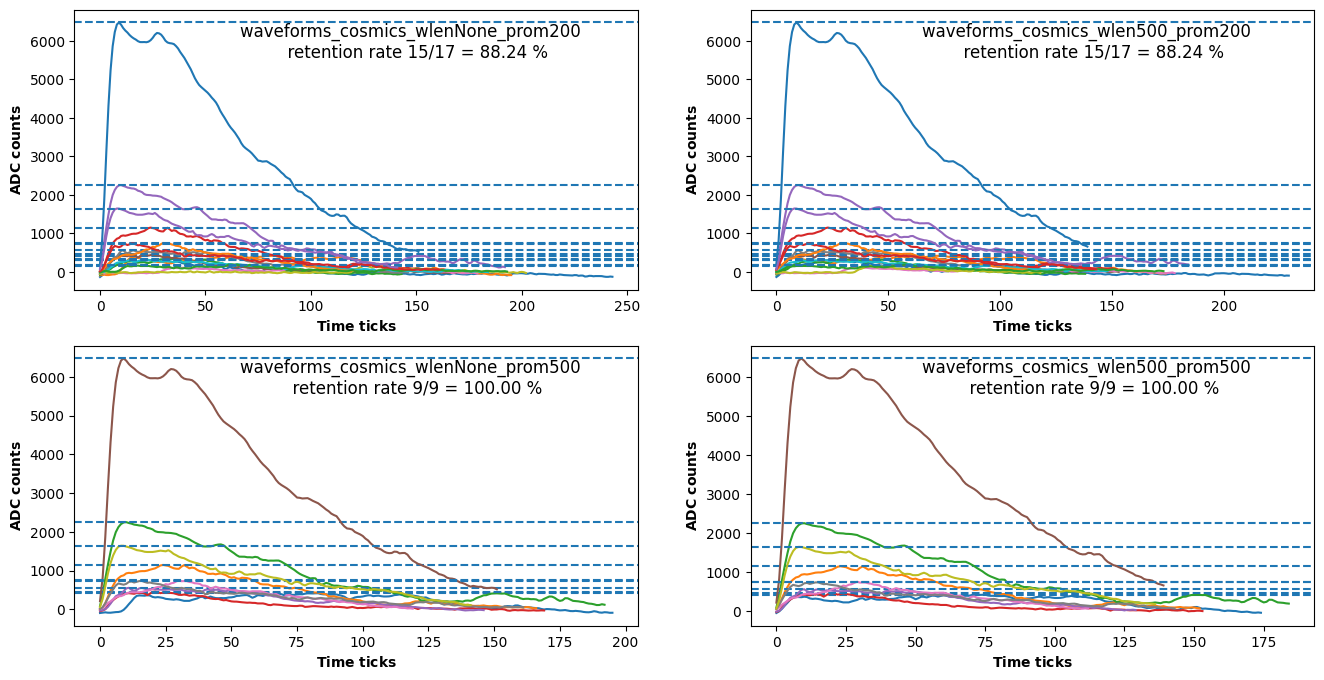

In [12]:
ADCsat = 16383

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for prop in prop_dict:
    res = prop_dict[prop][0]
    ax = axs.flatten()[j]
    nTirggerRecords = 1 #len(res['waveforms'])
    Ntot, Nsel = 0, 0
    for trigger_idx in range(0, nTirggerRecords):
        trigger_record = res['waveforms'][trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
            Ntot+=1
            if (res['peak_heights'][trigger_idx][i] + res['pedestals'][trigger_idx] < ADCsat) and (500 > res['properties'][trigger_idx]['widths'][i] > 100):
                Nsel+=1
                ax.plot(trigger_record[i].transpose())
                ax.axhline(y = prop_dict[prop][0]['peak_heights'][trigger_idx][i], linestyle='--')
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    ax.set_title(f"{prop_dict[prop][1]} \n  retention rate {Nsel}/{Ntot} = {Nsel*100/Ntot:.2f} %", y=0.8, x = 0.6);
    j+=1;

## Peak Heights

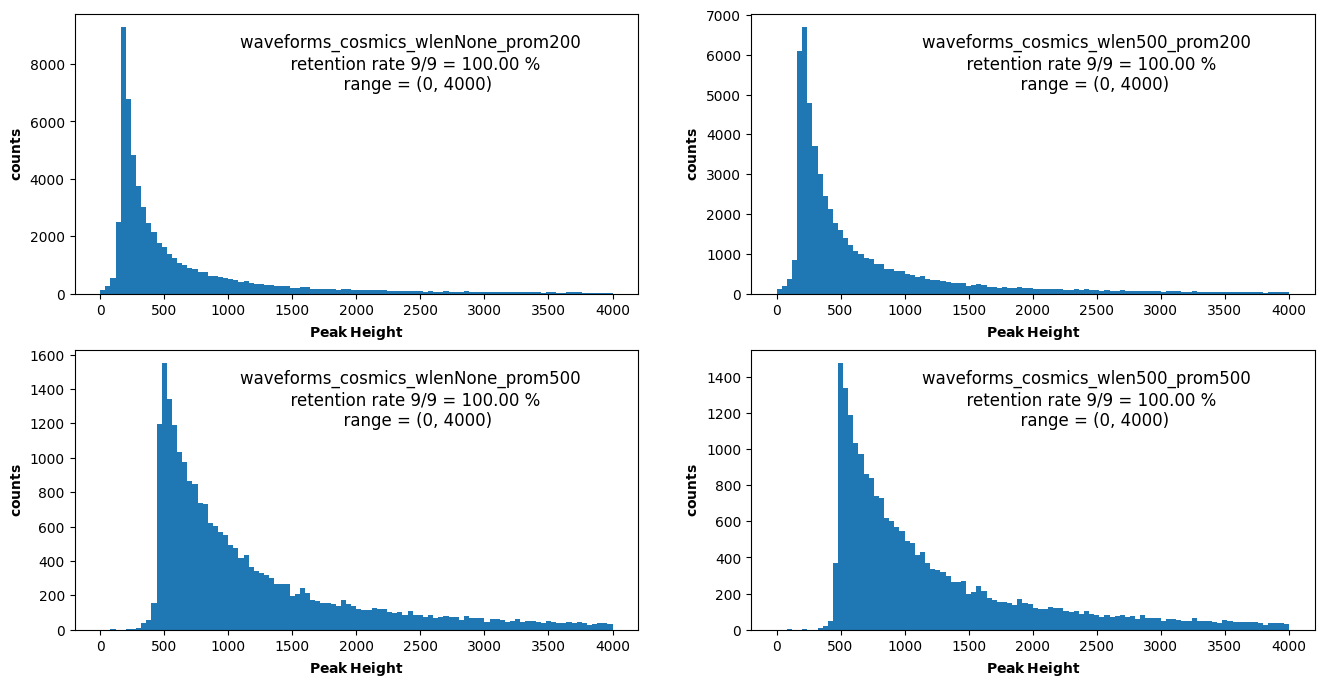

In [13]:
ADCsat = 16383

rg = None
rg = (0, 4000) #None

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for prop in prop_dict:
    res = prop_dict[prop][0]
    ax = axs.flatten()[j]
    nTirggerRecords = len(res['waveforms'])
    
    heights_hist = []
    for trigger_idx in range(0, nTirggerRecords):
        trigger_record = res['waveforms'][trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
            heights_hist.append(prop_dict[prop][0]['peak_heights'][trigger_idx][i])
    ax.hist(heights_hist, bins=100, label = prop_dict[prop][1], range=rg) 
    ax.set_xlabel(r"$\mathrm{\bf Peak \, Height}$")
    ax.set_ylabel(r"$\mathrm{\bf counts}$");
    if rg is not None:
        ax.set_title(f"{prop_dict[prop][1]} \n  retention rate {Nsel}/{Ntot} = {Nsel*100/Ntot:.2f} % \n  range = {rg}", x = 0.6, y = 0.7);
    else:
        ax.set_title(f"{prop_dict[prop][1]} \n  retention rate {Nsel}/{Ntot} = {Nsel*100/Ntot:.2f} %", y=0.8, x = 0.6);

    j+=1;

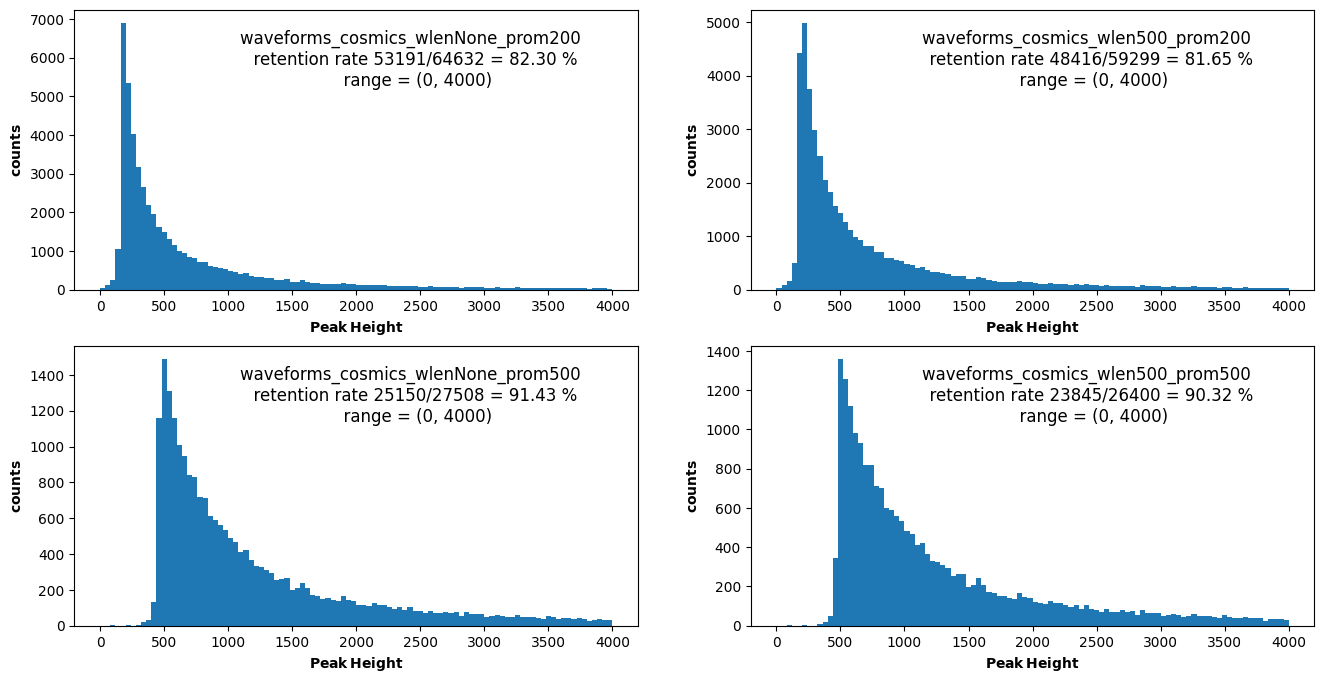

In [14]:
ADCsat = 16383

rg = None
rg = (0, 4000) #None

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for prop in prop_dict:
    res = prop_dict[prop][0]
    ax = axs.flatten()[j]
    nTirggerRecords = len(res['waveforms'])
    Ntot, Nsel = 0, 0
    heights_hist = []
    for trigger_idx in range(0, nTirggerRecords):
        trigger_record = res['waveforms'][trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
            Ntot+=1
            if (res['peak_heights'][trigger_idx][i] + res['pedestals'][trigger_idx] < ADCsat) and (500 > res['properties'][trigger_idx]['widths'][i] > 100):
                Nsel+=1
                heights_hist.append(prop_dict[prop][0]['peak_heights'][trigger_idx][i])
    ax.hist(heights_hist, bins=100, label = prop_dict[prop][1], range=rg) 
    ax.set_xlabel(r"$\mathrm{\bf Peak \, Height}$")
    ax.set_ylabel(r"$\mathrm{\bf counts}$");
    if rg is not None:
        ax.set_title(f"{prop_dict[prop][1]} \n  retention rate {Nsel}/{Ntot} = {Nsel*100/Ntot:.2f} % \n  range = {rg}", x = 0.6, y = 0.7);
    else:
        ax.set_title(f"{prop_dict[prop][1]} \n  retention rate {Nsel}/{Ntot} = {Nsel*100/Ntot:.2f} %", y=0.8, x = 0.6);

    j+=1;

## Peak Positions (within trigger rec.)

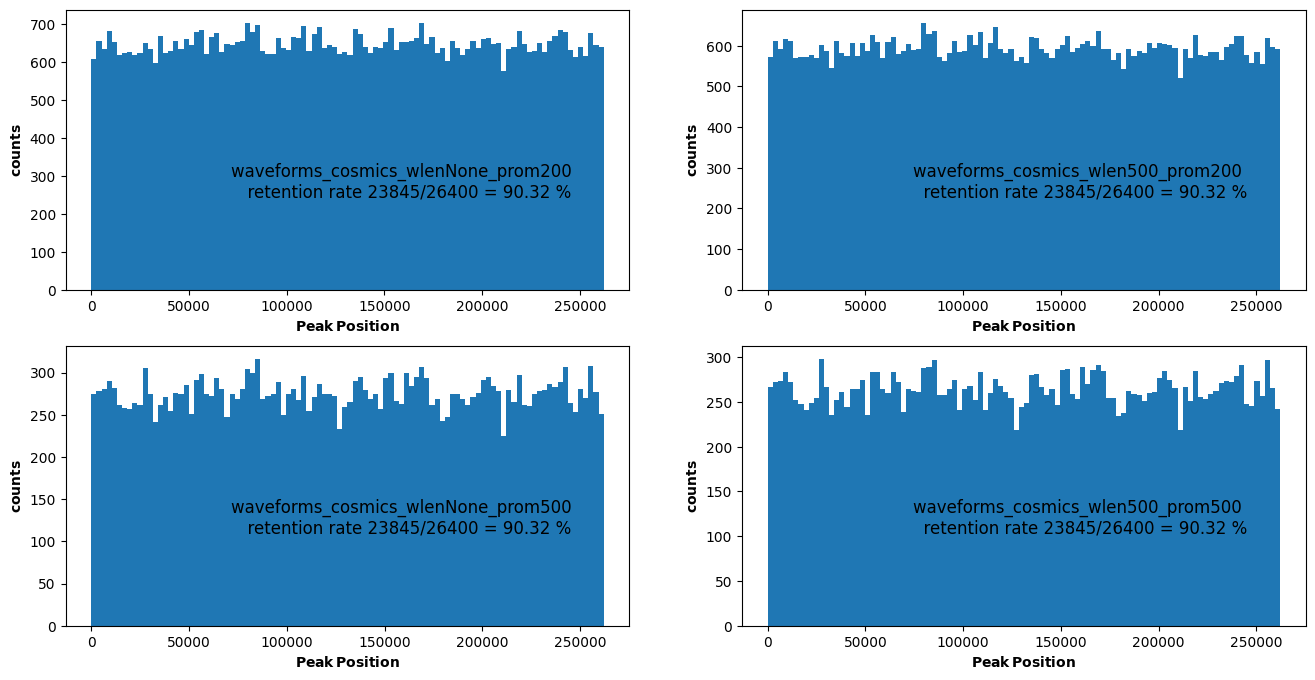

In [15]:
ADCsat = 16383

rg = None
# rg = (0, 4000) #None

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for prop in prop_dict:
    res = prop_dict[prop][0]
    ax = axs.flatten()[j]
    nTirggerRecords = len(res['waveforms'])
    
    heights_hist = []
    for trigger_idx in range(0, nTirggerRecords):
        trigger_record = res['waveforms'][trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
            heights_hist.append(prop_dict[prop][0]['peak_indices_2d'][trigger_idx][i])
    ax.hist(heights_hist, bins=100, label = prop_dict[prop][1], range=rg) 
    ax.set_xlabel(r"$\mathrm{\bf Peak \, Position}$")
    ax.set_ylabel(r"$\mathrm{\bf counts}$");
    if rg is not None:
        ax.set_title(f"{prop_dict[prop][1]} \n  retention rate {Nsel}/{Ntot} = {Nsel*100/Ntot:.2f} % \n  range = {rg}", x = 0.6, y = 0.3);
    else:
        ax.set_title(f"{prop_dict[prop][1]} \n  retention rate {Nsel}/{Ntot} = {Nsel*100/Ntot:.2f} %", y=0.3, x = 0.6);

    j+=1;

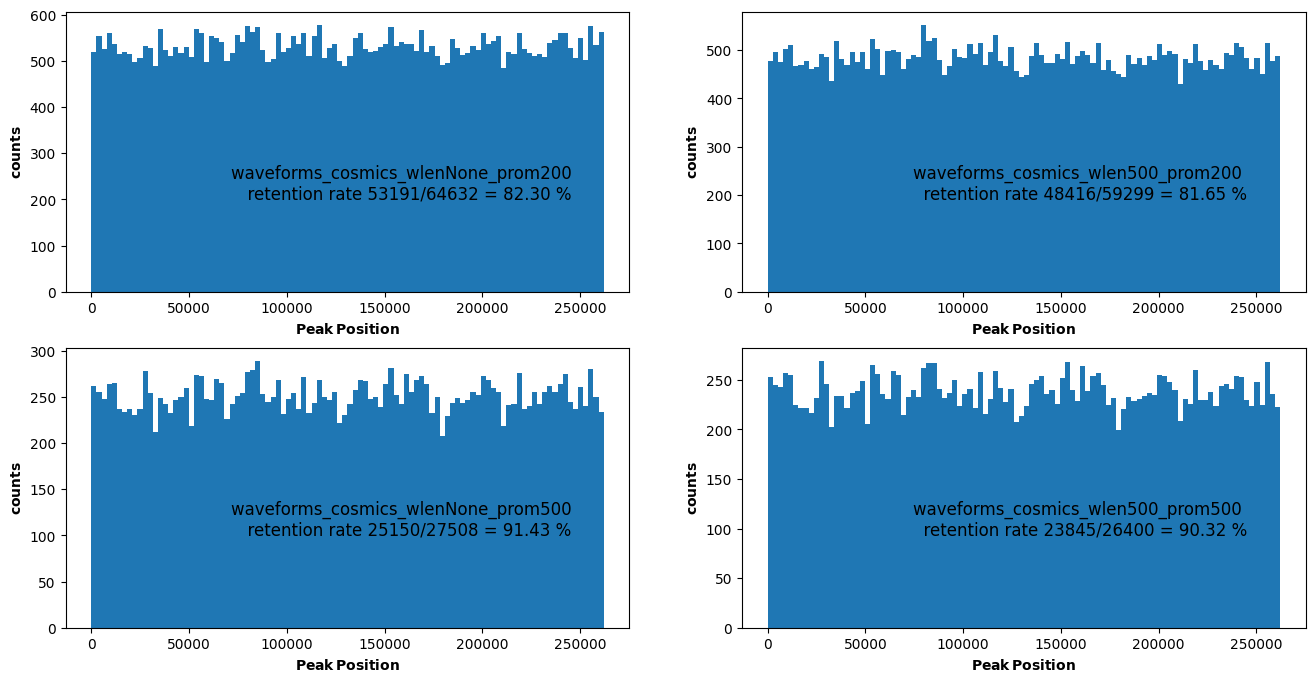

In [16]:
ADCsat = 16383

rg = None
# rg = (0, 4000) #None

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for prop in prop_dict:
    res = prop_dict[prop][0]
    ax = axs.flatten()[j]
    nTirggerRecords = len(res['waveforms'])
    Ntot, Nsel = 0, 0
    heights_hist = []
    for trigger_idx in range(0, nTirggerRecords):
        trigger_record = res['waveforms'][trigger_idx]
        for i in np.arange(0, len(trigger_record), 1):
            Ntot+=1
            if (res['peak_heights'][trigger_idx][i] + res['pedestals'][trigger_idx] < ADCsat) and (500 > res['properties'][trigger_idx]['widths'][i] > 100):
                Nsel+=1
                heights_hist.append(prop_dict[prop][0]['peak_indices_2d'][trigger_idx][i])
    ax.hist(heights_hist, bins=100, label = prop_dict[prop][1], range=rg) 
    ax.set_xlabel(r"$\mathrm{\bf Peak \, Position}$")
    ax.set_ylabel(r"$\mathrm{\bf counts}$");
    if rg is not None:
        ax.set_title(f"{prop_dict[prop][1]} \n  retention rate {Nsel}/{Ntot} = {Nsel*100/Ntot:.2f} % \n  range = {rg}", x = 0.6, y = 0.3);
    else:
        ax.set_title(f"{prop_dict[prop][1]} \n  retention rate {Nsel}/{Ntot} = {Nsel*100/Ntot:.2f} %", y=0.3, x = 0.6);

    j+=1;